<a href="https://colab.research.google.com/github/cai-yuqing/IA-flood-risk-129/blob/main/01_Exercise_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import math
import numpy as np

xy_data = np.load('/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

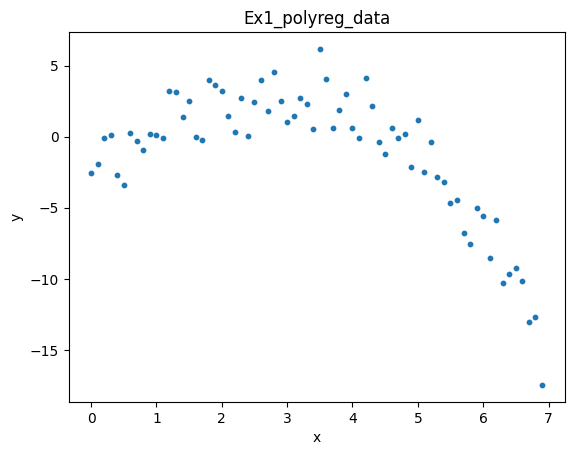

In [3]:
import matplotlib.pyplot as plt
x_data = xy_data[:,0]      # First column of array (indexed by 0) contains the dates 
y_data = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels

plt.scatter(x_data, y_data, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ex1_polyreg_data')
plt.show()# Your code for scatterplot here



### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [22]:
def polyreg(data_matrix, k):
  N = len(data_matrix[:,0])
  all_ones = np.ones(np.shape(data_matrix[:,0]))
  for i in range (k+1):
    X = np.column_stack([data_matrix[:,0]**i for i in range (min(k+1, N))])
  beta = np.linalg.lstsq(X, data_matrix[:,1], rcond=None)[0]
  if k > N:
    beta = beta + [0]*(k-N)
  fit = X.dot(beta)
  residuals = data_matrix[:,1] - fit
  return beta, fit, residuals


    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    

Use the tests below to check the outputs of the function you have written:

In [23]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0]
print(beta_test) 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

[ 2. -7.  3.]


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

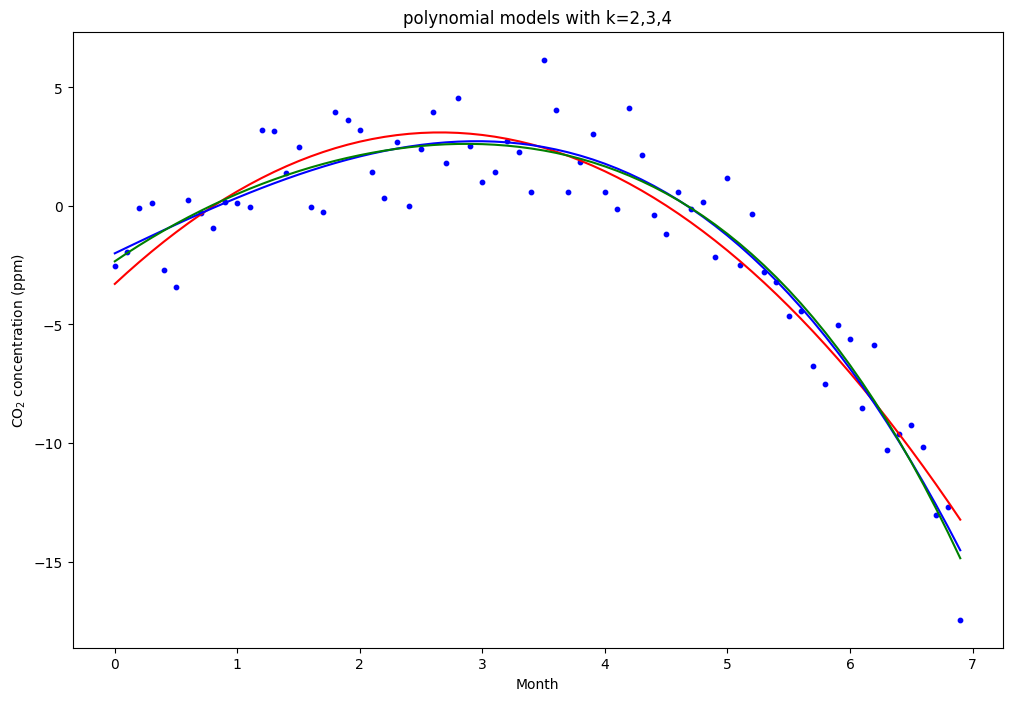

SSE_2 =  172.18102528988547  R^2 for k=2 is  0.8876
SSE_3 =  152.4058048891581  R^2 for k=3 is  0.9005
SSE_2 =  151.22778969027124  R^2 for k=4 is  0.9013


In [26]:
beta_0, fit_0, residuals_0 = polyreg(xy_data, 0)
beta_2, fit_2, residuals_2 = polyreg(xy_data, 2)
beta_3, fit_3, residuals_3 = polyreg(xy_data, 3)
beta_4, fit_4, residuals_4 = polyreg(xy_data, 4)

plt.rcParams['figure.figsize'] = [12, 8]
plt.scatter(x_data, y_data, s=10, color ='blue')   # s can be used to adjust the size of the dots
plt.plot(x_data, fit_2, color = 'red', label = 'k=2')
plt.plot(x_data, fit_3, color = 'blue', label = 'k=3')
plt.plot(x_data, fit_4, color = 'green', label = 'k=4')
#plt.plot(dates, fit_0)  
plt.xlabel('Month')
plt.ylabel('CO$_2$ concentration (ppm)')
plt.title('polynomial models with k=2,3,4')
#plt.savefig('CO2_linear_fit.pdf', bbox = 'tight')
plt.show()

#We now compute the sum of squared errors and the MSE
SSE_0 = np.linalg.norm(residuals_0)**2
SSE_2 = np.linalg.norm(residuals_2)**2
SSE_3 = np.linalg.norm(residuals_3)**2
SSE_4 = np.linalg.norm(residuals_4)**2

R22 = np.round(1- SSE_2/SSE_0, decimals = 4)
R32 = np.round(1- SSE_3/SSE_0, decimals = 4)
R42 = np.round(1- SSE_4/SSE_0, decimals = 4)

print('SSE_2 = ', SSE_2, ' R^2 for k=2 is ', R22)  
print('SSE_3 = ', SSE_3, ' R^2 for k=3 is ', R32)  
print('SSE_2 = ', SSE_4, ' R^2 for k=4 is ', R42)  


#Your code here



 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>
 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

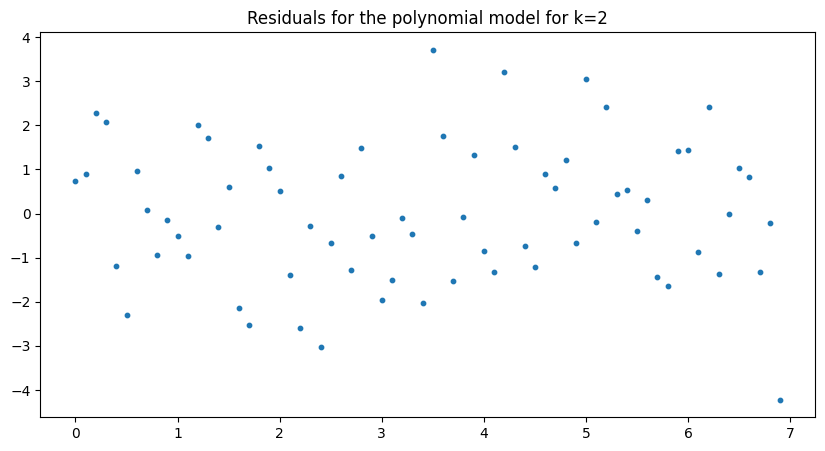

Mean of residuals =  0.0 Variance of residuals =  2.46


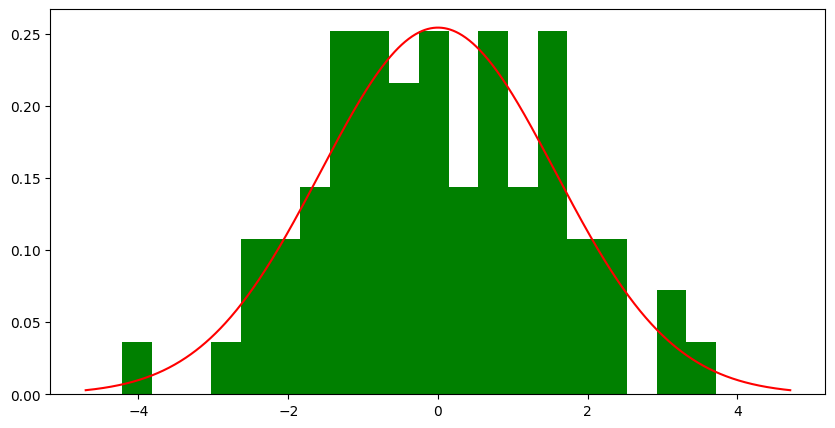

In [29]:
# Computing the residuals
from scipy.stats import norm

plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x_data, residuals_2, s=10)
plt.title('Residuals for the polynomial model for k=2')
plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals = ', np.round(np.mean(residuals_2), 3), 
      'Variance of residuals = ', np.round(np.var(residuals_2),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(residuals_2, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_quad_stdev = np.std(residuals_2)  #standard deviation of residuals
xvals = np.linspace(-3*res_quad_stdev,3*res_quad_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_quad_stdev), 'r')
plt.show()#Your code here

